In [1]:
#Plot of confirmed Corona cases in selected countries.
#Last update: 2020-03-17, 9:00, JL

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#https://github.com/CSSEGISandData/COVID-19
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [2]:
df = pd.read_csv(url,index_col=None)
df=df.drop(['Lat','Long'],axis=1)
df=df.set_index([*df.columns[:2]])
df=df.stack().reset_index()
df.columns=['state','country','date','cases']
df.date=pd.to_datetime(df.date)
df=df.groupby(['country','date']).sum().reset_index()
df.tail()

,country,date,cases
8575,occupied Palestinian territory,2020-03-12,0
8576,occupied Palestinian territory,2020-03-13,0
8577,occupied Palestinian territory,2020-03-14,0
8578,occupied Palestinian territory,2020-03-15,0
8579,occupied Palestinian territory,2020-03-16,0


In [3]:
allCountries=sorted(df.country.unique())
for a,b,c in zip(allCountries[::3],allCountries[1::3],allCountries[2::3]):
    print('{:<30}{:<30}{:<}'.format(a,b,c))

Afghanistan                   Albania                       Algeria
Andorra                       Antigua and Barbuda           Argentina
Armenia                       Aruba                         Australia
Austria                       Azerbaijan                    Bahrain
Bangladesh                    Belarus                       Belgium
Benin                         Bhutan                        Bolivia
Bosnia and Herzegovina        Brazil                        Brunei
Bulgaria                      Burkina Faso                  Cambodia
Cameroon                      Canada                        Central African Republic
Chile                         China                         Colombia
Congo (Brazzaville)           Congo (Kinshasa)              Costa Rica
Cote d'Ivoire                 Croatia                       Cruise Ship
Cuba                          Cyprus                        Czechia
Denmark                       Dominican Republic            Ecuador
Egypt              

In [4]:
plotCountries=['Germany','Italy','Spain','Iran','Portugal', 'Korea, South','US']
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')

C:\Users\jlarsch\AppData\Local\Continuum\miniconda3\envs\jlsocial\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


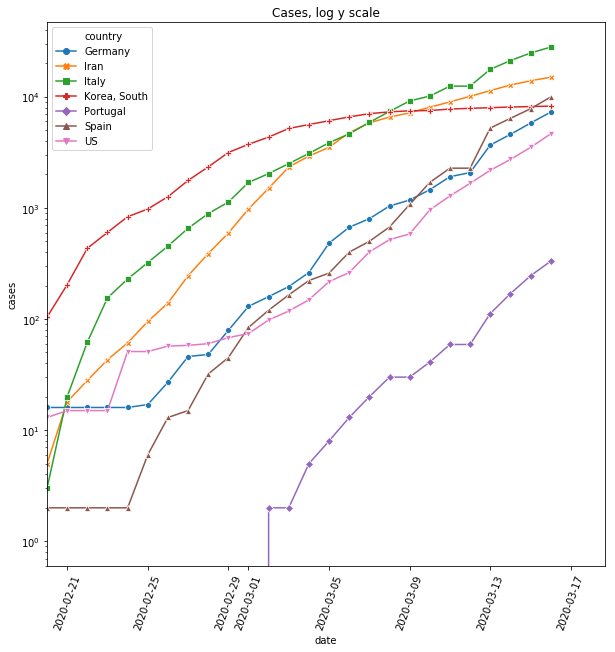

In [5]:
plt.subplots(figsize=(10,10))
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)
ax = g.axes
ax.set_yscale('log')
plt.title('Cases, log y scale')
plt.xlim(left=plotStartDate)
plt.xticks(rotation=70);

In [6]:
df.date.max()

Timestamp('2020-03-16 00:00:00')

Note similar slopes of european countries. Italy took of earlier

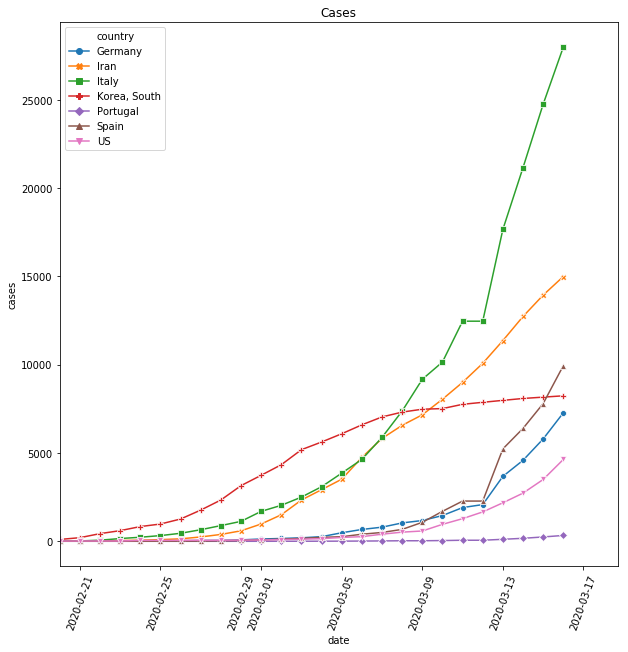

In [7]:
plt.subplots(figsize=(10,10))
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.title('Cases');
plt.xticks(rotation=70);
plt.xlim(left=plotStartDate);

In [8]:
ix=df.country.isin([plotCountries[0]])
df.loc[ix][-3:]

,country,date,cases
2912,Germany,2020-03-14,4585
2913,Germany,2020-03-15,5795
2914,Germany,2020-03-16,7272


In [9]:
ix=df.country.isin([plotCountries[-1]])
df.loc[ix][-3:]

,country,date,cases
8137,US,2020-03-14,2727
8138,US,2020-03-15,3499
8139,US,2020-03-16,4632


# Plot cases aligned to date of crossing 100 cases

Text(0.5, 0, 'days since 100 cases')

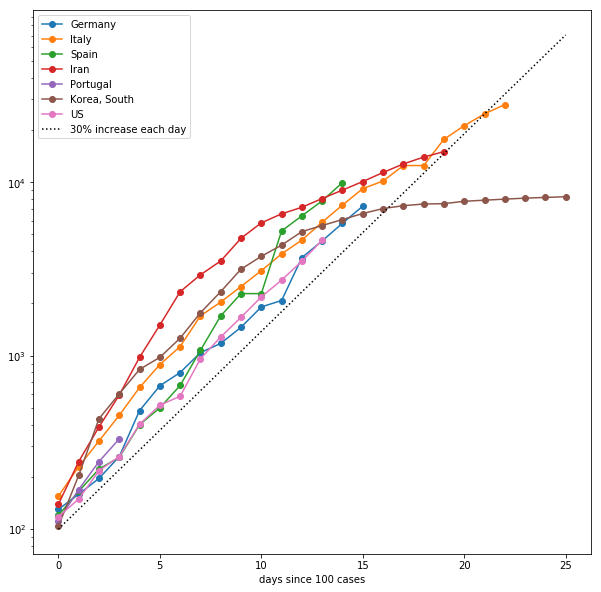

In [12]:
fix,ax=plt.subplots(figsize=(10,10))


for i,c in enumerate(plotCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        inflect=np.argmax(ts>100)
        ax.plot(ts[inflect:],'o-',label=c)
    
t=np.linspace(0,25,100)
e=100*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')